In [376]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [377]:
import pandas as pd

### quest
- 목표변수 : 생존여부
- 설명변수 : 연속형, 범주형 섞어 7개 이상

### 분석 스토리
- 설명 변수 : Survived, 분포 언밸런스
- 목표 변수
    - 'Age' : 작은 수치의 차이로 나이가 많은 사람보다 나이가 적은 사람이 많이 생존한 것 같음
    - 'Sex' : 남성 보다 여성의 생존률이 높아보임.
    - 'Ticket',
    - 'Fare' : 비교적으로 많은 비용의 요금을 낸 사람이 생존 확률이 높다.
    - 'Embarked' : C항구 탑승자가 비교적으로 생존률이 높으며, Q항구 탑승자가 비교적으로 생존률이 낮은 것으로 보임.
    - 'Pclass' : firstClass 탑승자의 생존률이 가장 많으며, 나쁜 사회이다.

In [378]:
df_ROS = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_ROS.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [379]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### object 변경 할 것
- Survived
- Pclass

In [380]:
df_ROS['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [381]:
df_ROS['Pclass'] = df_ROS['Pclass'].astype(object)

In [382]:
df_ROS.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [383]:
selected_columns = ['Age', 'Sex', 'Ticket', 'Fare', 'Embarked', 'Pclass', 'Survived']
df_ROS_patient = df_ROS[selected_columns]
df_ROS_patient

,Age,Sex,Ticket,Fare,Embarked,Pclass,Survived
0,22.0,male,A/5 21171,7.2500,S,3,0
1,38.0,female,PC 17599,71.2833,C,1,1
2,26.0,female,STON/O2. 3101282,7.9250,S,3,1
3,35.0,female,113803,53.1000,S,1,1
4,35.0,male,373450,8.0500,S,3,0
...,...,...,...,...,...,...,...
886,27.0,male,211536,13.0000,S,2,0
887,19.0,female,112053,30.0000,S,1,1
888,NaN,female,W./C. 6607,23.4500,S,3,0
889,26.0,male,111369,30.0000,C,1,1


In [384]:
df_ROS_patient.isnull().sum()

Age         177
Sex           0
Ticket        0
Fare          0
Embarked      2
Pclass        0
Survived      0
dtype: int64

In [385]:
df_ROS_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Ticket    891 non-null    object 
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Pclass    891 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 48.9+ KB


In [386]:
patient_list = df_ROS_patient.describe().columns.to_list()
patient_list

['Age', 'Fare', 'Survived']

In [387]:
df_ROS_patient.describe(include=object)

,Sex,Ticket,Embarked,Pclass
count,891,891,889,891
unique,2,681,3,3
top,male,347082,S,3
freq,577,7,644,491


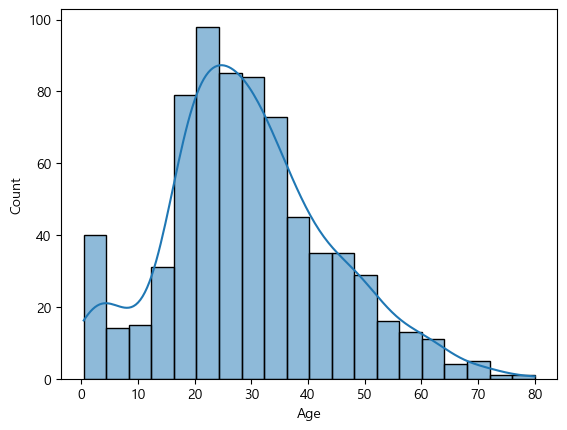

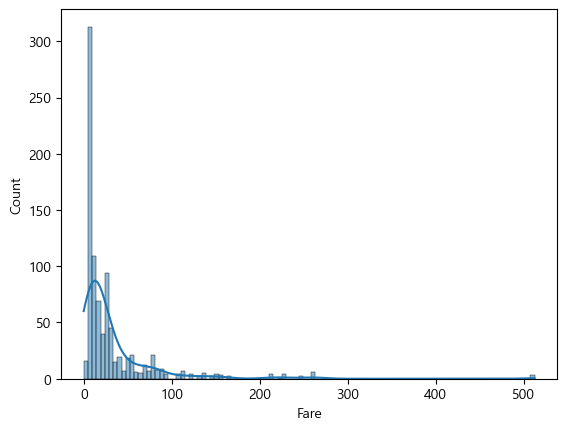

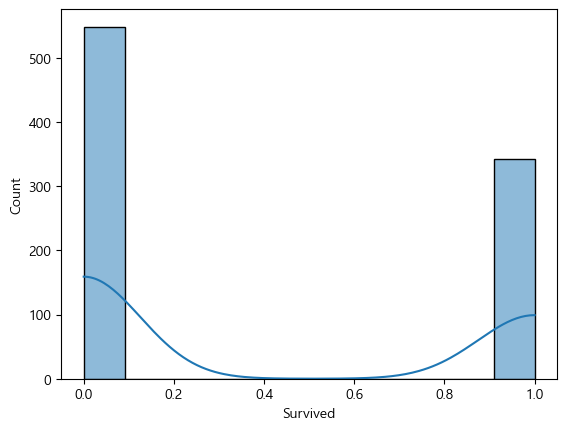

In [388]:
for item in patient_list:
    sns.histplot(data=df_ROS_patient, x=item, kde=True)
    plt.show()

<Axes: xlabel='Survived', ylabel='count'>

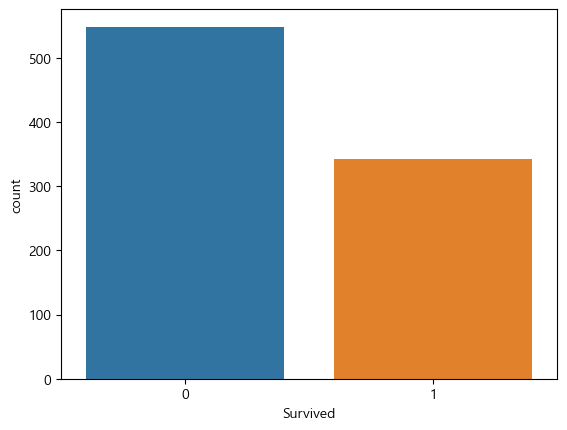

In [389]:
sns.countplot(data=df_ROS_patient, x='Survived')

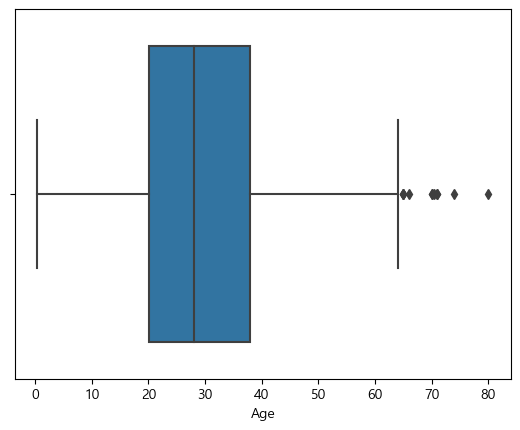

In [390]:
sns.boxplot(data=df_ROS_patient, x='Age')
plt.show()

In [391]:
df_ROS_patient['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [392]:
df_ROS_patient = df_ROS_patient.dropna()

In [393]:
Q1 = df_ROS_patient['Age'].describe()['25%']
Q3 = df_ROS_patient['Age'].describe()['75%']

In [394]:
Q1 = df_ROS_patient['Age'].describe()['25%']
Q3 = df_ROS_patient['Age'].describe()['75%']
IQR = Q3 - Q1
bound_up = Q3 + IQR * 1.5
bound_down = Q1 - IQR * 1.5
condition = (df_ROS_patient['Age'] <= bound_up) & (df_ROS_patient['Age'] >= bound_down)
df_ROS_patient_copy = df_ROS_patient[condition].copy()

In [395]:
IQR, Q3, Q1

(18.0, 38.0, 20.0)

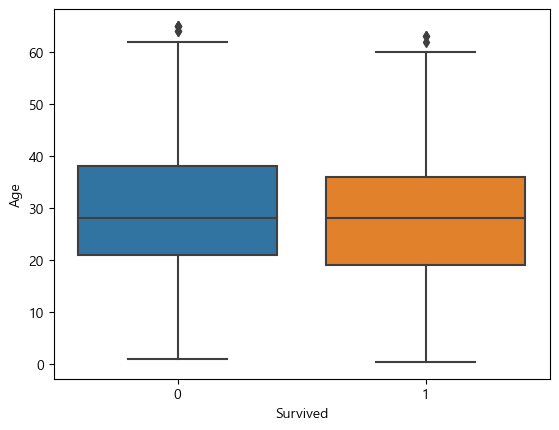

In [396]:
sns.boxplot(data=df_ROS_patient_copy, x='Survived', y='Age')
plt.show()

In [397]:
Q1 = df_ROS_patient['Fare'].describe()['25%']
Q3 = df_ROS_patient['Fare'].describe()['75%']
IQR = Q3 - Q1
bound_up = Q3 + IQR * 1.5
bound_down = Q1 - IQR * 1.5
condition = (df_ROS_patient['Fare'] <= bound_up) & (df_ROS_patient['Fare'] >= bound_down)
df_ROS_patient_condition = df_ROS_patient[condition]

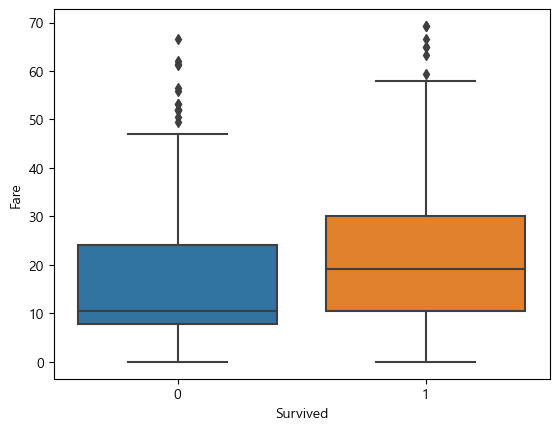

In [398]:
sns.boxplot(data=df_ROS_patient_condition, x='Survived', y='Fare')
plt.show()

In [399]:
age_list = df_ROS_patient_condition[['Age','Fare']].columns.to_list()

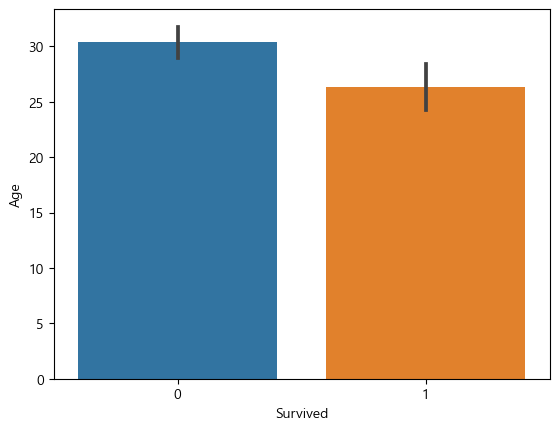

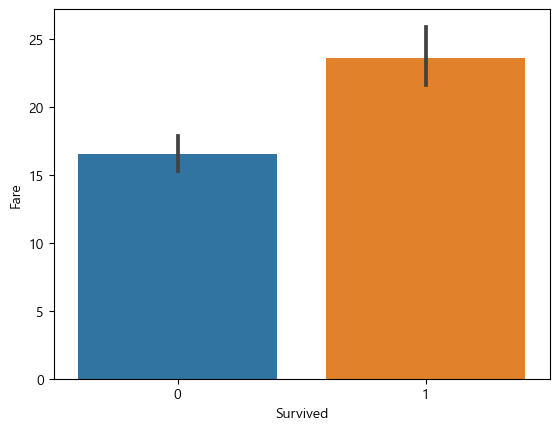

In [400]:
for item in age_list:
    sns.barplot(data=df_ROS_patient_condition, x='Survived', y=item)
    plt.show()

### 범주형 분석

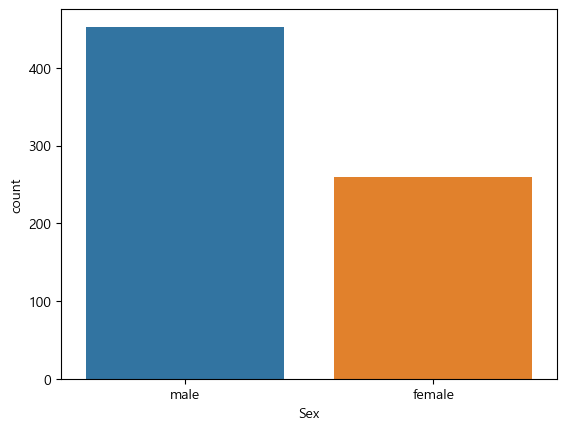

In [401]:
sns.countplot(data=df_ROS_patient, x='Sex')
plt.show()

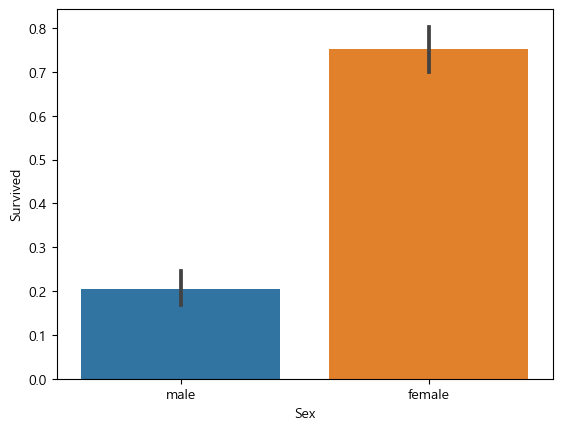

In [402]:
sns.barplot(data=df_ROS_patient, x='Sex', y='Survived')
plt.show()

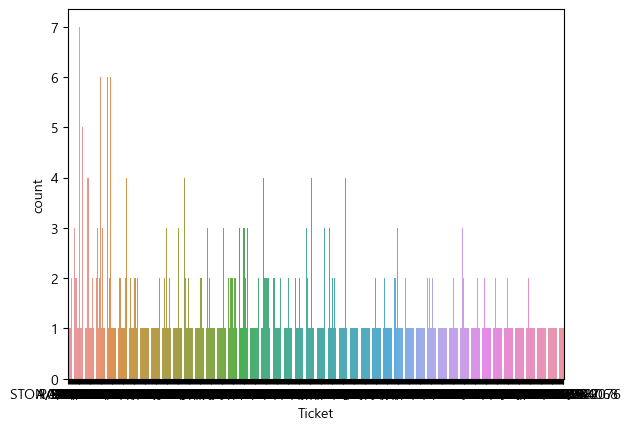

In [403]:
sns.countplot(data=df_ROS_patient, x='Ticket')
plt.show()

In [404]:
df_ROS_patient['Ticket'].value_counts()

347082          7
CA 2144         6
3101295         6
347088          6
S.O.C. 14879    5
               ..
250651          1
2693            1
349233          1
349236          1
370376          1
Name: Ticket, Length: 541, dtype: int64

In [405]:
df_ROS_patient['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
885              382652
886              211536
887              112053
889              111369
890              370376
Name: Ticket, Length: 712, dtype: object

In [406]:
list_patient = df_ROS_patient.describe(include=object).columns.to_list()
list_patient

['Sex', 'Ticket', 'Embarked', 'Pclass']

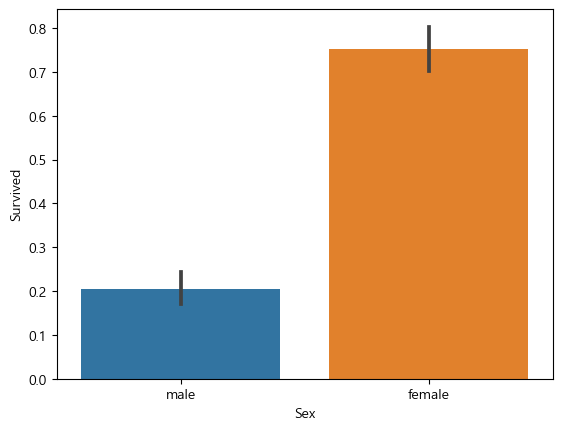

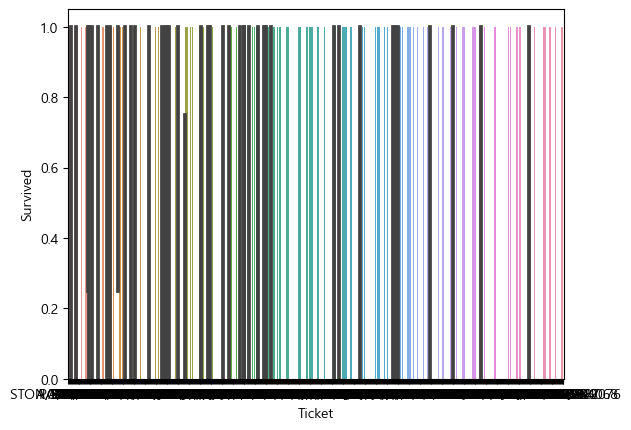

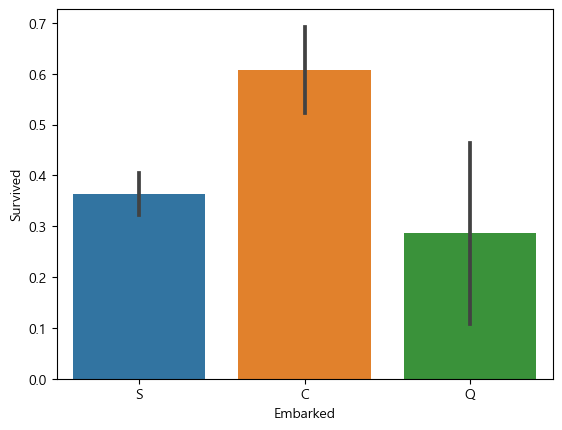

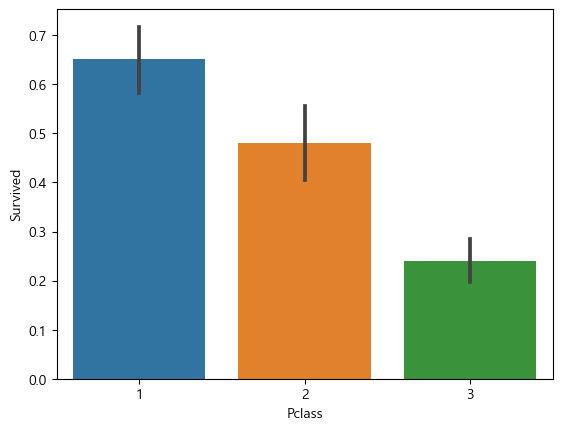

In [407]:
for item in list_patient:
    sns.barplot(data=df_ROS_patient, x=item, y='Survived')
    plt.show()

In [408]:
import numpy as np
df_ROS_sum = pd.pivot_table(df_ROS_patient, index='Ticket', values='Survived', aggfunc=np.sum)
df_list_ticket = df_ROS_patient['Ticket'].value_counts().iloc[:7].index.to_list()
df_list_ticket

['347082',
 'CA 2144',
 '3101295',
 '347088',
 'S.O.C. 14879',
 '382652',
 'W./C. 6608']

<Axes: xlabel='Ticket', ylabel='Survived'>

C:\Users\5-18\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\5-18\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


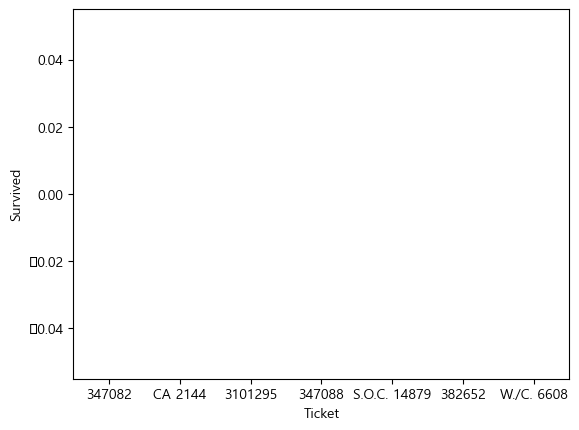

In [409]:
sns.barplot(data=df_ROS_patient, x='Ticket', y='Survived', order=df_list_ticket)